## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [4]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
#4 Check for missing  values if any, replace with appropriate values
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
#5 Prepare  X (independent variables) and y (dependent variable)
# Define the dependent variable (target)
y = df['price'] 

# Define the independent variables (features)
X = df.drop(columns=['price'])

# Display the first few rows of X and y
print("Independent variables (X):\n", X.head())
print("\nDependent variable (y):\n", y.head())


Independent variables (X):
    area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dependent variable (y):
 0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


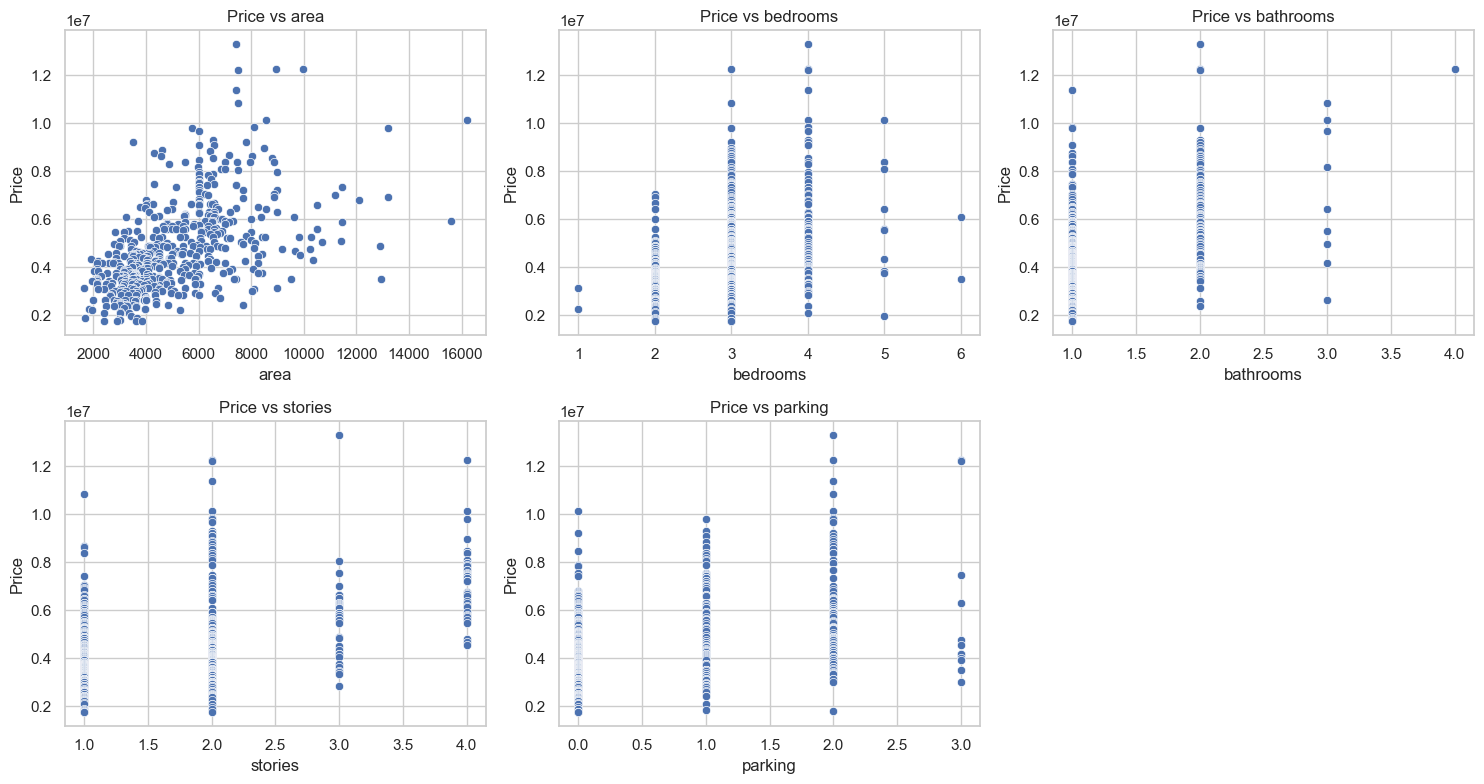

In [7]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create scatter plots for numerical independent variables
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Plot each feature against price
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')

plt.tight_layout()
plt.show()
# sns.pairplot(df)

In [20]:
#7 Encoding categorical data in 
from sklearn.preprocessing import LabelEncoder
category = df.select_dtypes(include=['object'])
for col in category.columns:
    x[col] = LabelEncoder().fit_transform(x[col])
# Encode categorical columns
# for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
#             'airconditioning', 'prefarea', 'furnishingstatus']:
#     X[col] = LabelEncoder().fit_transform(X[col])

print(X.head())
# label encoding


       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217         1          0         0   
1  1.757010  1.403419   5.405809  2.532024         1          0         0   
2  2.218232  0.047278   1.421812  0.224410         1          0         1   
3  1.083624  1.403419   1.421812  0.224410         1          0         1   
4  1.046726  1.403419  -0.570187  0.224410         1          1         1   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0                0                1  1.517692         1                 0  
1                0                1  2.679409         0                 0  
2                0                0  1.517692         1                 1  
3                0                1  2.679409         1                 0  
4                0                1  1.517692         0                 0  


In [9]:
#8  Avoiding the Dummy Variable Trap
# Convert categorical variables into dummy variables and avoid the dummy variable trap
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows
df_encoded.head()

# wanharting code 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features for scaling
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Initialize the scaler
scaler = StandardScaler()

# Apply feature scaling
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Display the scaled dataset
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


In [11]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((381, 12), (164, 12), (381,), (164,))

In [12]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
model.coef_, model.intercept_


(array([ 548676.87299684,   61007.57353683,  560930.5907925 ,
         360373.26651063,  408320.46478164,  279534.04145787,
         484980.21525134,  619934.34714776,  680006.92089594,
         261749.09078536,  509441.46380309, -198031.32519469]),
 4071726.9232334415)

In [21]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate errors
train_errors = y_train_pred - y_train

# Display the first few errors
train_errors.head()


126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
Name: price, dtype: float64

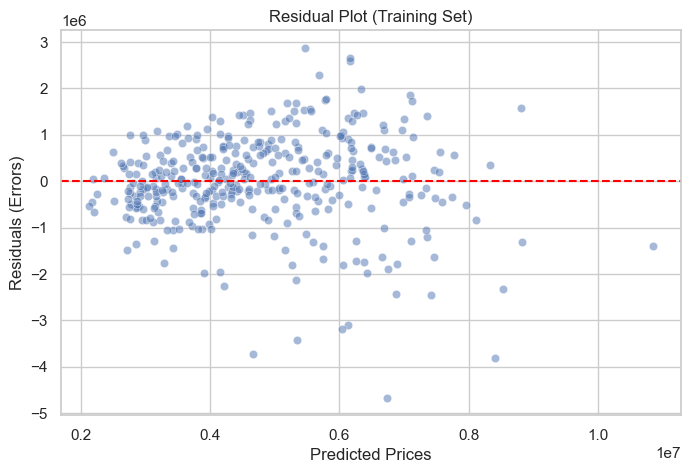

In [14]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import seaborn as sns
import matplotlib.pyplot as plt

# Residual plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_train_pred, y=train_errors, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot (Training Set)")
plt.show()


In [15]:
#14  Predic on the test set
# Predict on the test set
y_test_pred = model.predict(X_test)

# Display the first few predictions
y_test_pred[:5]


array([5407508.87024418, 7097185.46706854, 3055462.44314053,
       4476945.19636315, 3315983.65663579])

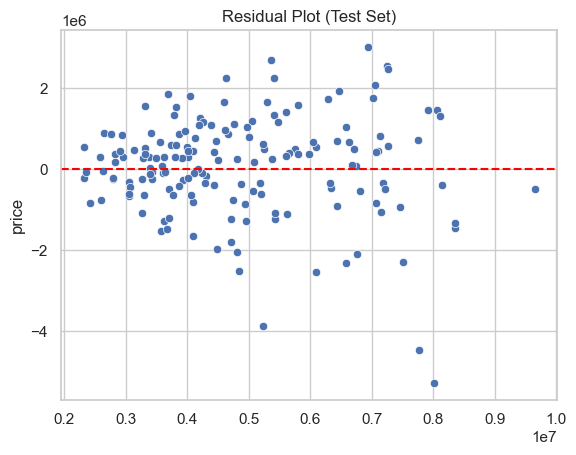

In [16]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
test_errors = y_test_pred - y_test
sns.scatterplot(x=y_test_pred, y=test_errors).set(title="Residual Plot (Test Set)")
plt.axhline(0, color='red', linestyle='--')
plt.show()



In [17]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Compute MSE and R² score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print results
print("Mean Squared Error:", mse)
print("R-Squared Value:", r2)


Mean Squared Error: 1535047758428.0498
R-Squared Value: 0.6435419628959107


In [18]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
n, k = X_train.shape
adj_r2 = 1 - (1 - r2_score(y_test, y_test_pred)) * (n - 1) / (n - k - 1)
print("Adjusted R²:", adj_r2)


Adjusted R²: 0.6319183312512122


In [19]:
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           